In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import sys
sys.path.append("..")
from exotop.model_1D import the_results as plottop
from exotop.model_1D import parameters as p
from exotop.useful_and_bespoke import colorize

# set paths
# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = '../latex/report-firstyr/figs/'
fig_format = '.png'
benchmark_path = '../benchmarks/'

# # set mpl display parameters
# mpl.rcParams['axes.linewidth'] = 2  # set the value globally - for poster
# rc('font',**{'family':'serif','serif':['Times New Roman']})  # latex font for matplotlib CMU Serif Roman
# # rc('font',**{'family':'monospace','monospace':['Ubuntu Mono']})  # for computery poster 
# rc('text', usetex=True)  # turn on for latexy font
# mpl.font_manager._rebuild()

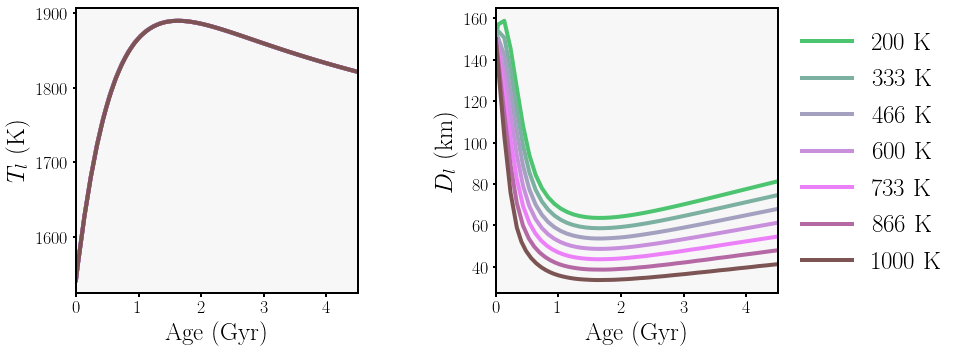

In [3]:
# poster thermal histories - plot different masses

def evols_with_Ts(pl_baseline='Earthbaseline', Ts_min=200, Ts_max=1000, num=7, fig_path=fig_path, save=True):
    names = {'T_l':('$T_l$ (K)',1), 
              'D_l':('$D_l$ (km)',1e-3), 
            }
    names2 = {
              'Ra_i':('log(Ra)',1), 
             'delta_eta':('$\Delta \eta$ (Pa s)',1),
            }

    fig, axes = plt.subplots(1, 2, figsize=(11,5))
    col= ['#4cc470', '#7cb0a0', '#a4a0c0', '#c890dc', '#ec80f8', '#b468a4', '#7c5454']
    col_rgb = [[76, 196, 112], [124, 176, 160], [164, 160, 192], [200, 144, 220] ,[236, 128, 248] ,
               [180, 104, 164] ,[124, 84, 84]]


    for ii, T_s in enumerate(np.linspace(Ts_min, Ts_max, num=num)):

        fig, axes = plottop.benchmark_thermal_plots(ident=pl_baseline, names=names, 
                                                 pl_update_args={'T_s':T_s},
                                            #compare_dir=['benchmarks/thiriet_Mars1', 'benchmarks/breuer_Mars'], 
                                            fig_path=fig_path, fig=fig, axes=axes,
                                            plots_save=False, print_tf=True, 
                                                 legsize=14, ncols=2, labelsize=25,
                                             ticksize=18, 
                                            show_qsfc_error=False,title='', legax=None,
                                            fontname='Ubuntu Mono',
                                                 label='{:d} K'.format(int(T_s)),
                                            line_args={'c':col[ii], 'lw':4, 'ls':'-'},
                                           )
    try:
        legend=axes[1].legend(frameon=False, fontsize=25, loc='upper left', 
                 bbox_to_anchor= (1.05, 0.95),
                 borderaxespad=0, ncol=1)   
    except AttributeError:
        legend=axes[0,0].legend(frameon=False, fontsize=25, loc='upper left', 
                 bbox_to_anchor= (1.05, 0.95),
                 borderaxespad=0, ncol=1)   

    # sc = axes[0].scatter([0,1], [0,1], cmap=cm)
    # fig.subplots_adjust(right=0.8)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # fig.colorbar(sc, cax=cbar_ax)
    # sc.set_visible=False

    for ax in axes:
        ax.xaxis.set_tick_params(width=2)
        ax.yaxis.set_tick_params(width=2)
        ax.set_facecolor('#f7f7f7')

    fig.subplots_adjust(wspace=.49)
    
    if save:
        fig.savefig(fig_path+'T_s2'+fig_format, bbox_inches='tight', rasterized=True, dpi=600)
        
evols_with_Ts(pl_baseline='Earthbaseline', save=True)

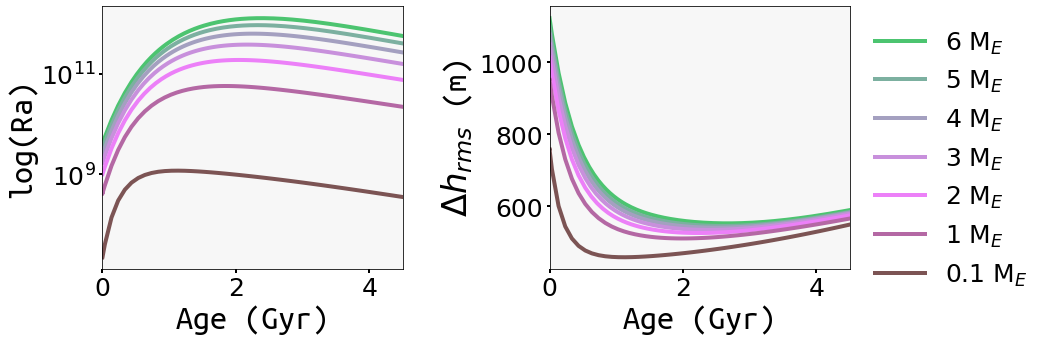

In [2]:
def evols_with_Mp(pl_baseline='Earthbaseline', Mp_eval=[0.1, 1, 2, 3, 4, 5, 6], save=True, fig_path=fig_path,
                 names=None, log=False, nrows=None, ncols=None):

    if names is None:
        names = {'Ra_i':('log(Ra)',1), 
                 'dyn_top_rms':('$\Delta h_{rms}$ (m)',1),
                }
    if nrows is None:
        nrows = 1
    if ncols is None:
        ncols = len(names)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols,5*nrows))
    #col = ['#4cc470','#68b894','#a4a0c0', '#e084f0', '#a86494', '#5c5034', '#506080', '#3868b8']
    col= ['#4cc470', '#7cb0a0', '#a4a0c0', '#c890dc', '#ec80f8', '#b468a4', '#7c5454']
    #col_rgb = [(tuple(int(h.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))) for h in col]
    col_rgb = [[76, 196, 112], [124, 176, 160], [164, 160, 192], [200, 144, 220] ,[236, 128, 248] ,
               [180, 104, 164] ,[124, 84, 84]]

    # print(col_rgb)
    # cm = mpl.colors.LinearSegmentedColormap.from_list('test',np.array(col_rgb)/255.0)

    for ii, M_p in enumerate(reversed(Mp_eval)):

        fig, axes = plottop.benchmark_thermal_plots(ident='Earthbaseline', names=names, 
                                                    pl_update_args={'M_p':M_p*p.M_E},
                                            #compare_dir=['benchmarks/thiriet_Mars1', 'benchmarks/breuer_Mars'], 
                                            fig_path=fig_path, fig=fig, axes=axes,
                                            plots_save=False, print_tf=True, 
                                                 legsize=14, ncols=ncols, labelsize=34,
                                             ticksize=25, fname='therm2.png',
                                            show_qsfc_error=False,title='', legax=None,
                                            fontname='Ubuntu Mono',
                                                 label=str(M_p)+' M$_E$',
                                            line_args={'c':col[ii], 'lw':4, 'ls':'-'},
                                           )

    legend=axes.flatten()[-1].legend(frameon=False, fontsize=25, loc='upper left', 
                 bbox_to_anchor= (1.05, 0.95),
                 borderaxespad=0, ncol=1)    
    # sc = axes[0].scatter([0,1], [0,1], cmap=cm)
    # fig.subplots_adjust(right=0.8)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # fig.colorbar(sc, cax=cbar_ax)
    # sc.set_visible=False

    for ax in axes.flatten():
        ax.xaxis.set_tick_params(width=2)
        ax.yaxis.set_tick_params(width=2)
        ax.set_facecolor('#f7f7f7')
        if log:
            ax.set_yscale('log')

    fig.subplots_adjust(wspace=.49)
    if save:
        fig.savefig(fig_path+'therm2'+fig_format, bbox_inches='tight', rasterized=True, dpi=600)
        
evols_with_Mp(pl_baseline='Earthbaseline', save=False)

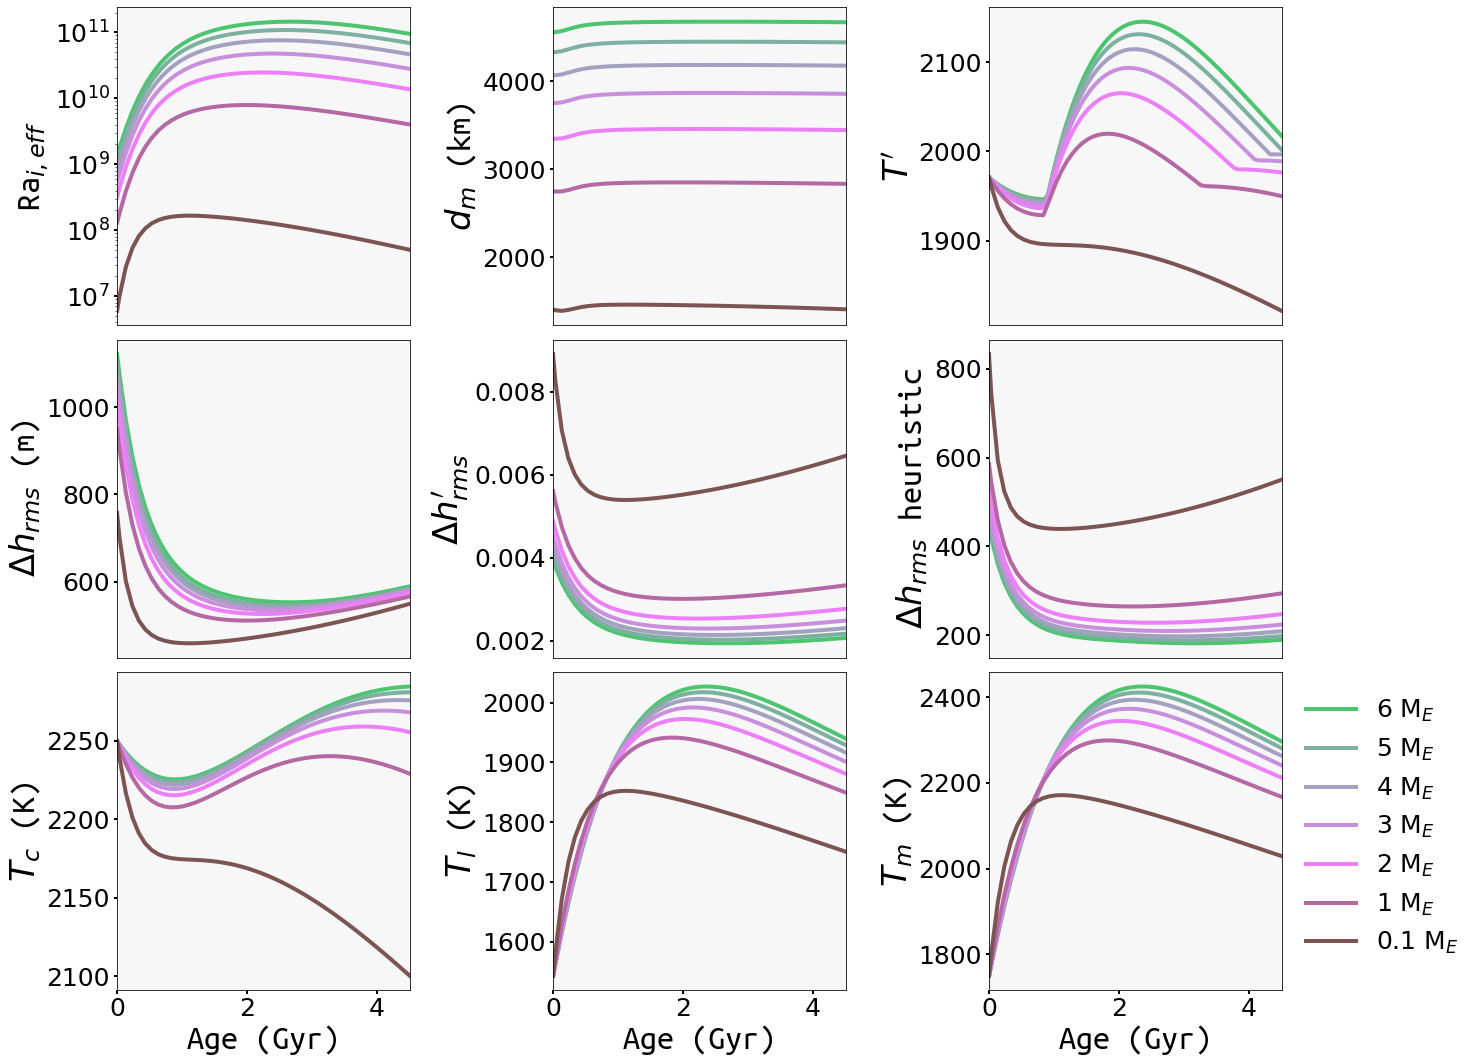

In [5]:
names = {'Ra_i_eff':('Ra$_{i, eff}$',1), 
                  'd_m':('$d_m$ (km)',1e-3),
                  'T_scale':('$T^\prime$',1),
         'dyn_top_rms':('$\Delta h_{rms}$ (m)',1),
         'dyn_top_aspect_prime':('$\Delta h_{rms}^\prime$',1),
         'dyn_top_heuristic':('$\Delta h_{rms}$ heuristic',1),
         'T_c':('$T_c$ (K)',1),
         'T_l':('$T_l$ (K)',1),
            'T_m':('$T_m$ (K)',1),
        }

evols_with_Mp(pl_baseline='Earthbaseline', save=False, names=names, log=False, nrows=3, ncols=3)

findfont: Font family ['CMU Serif Roman'] not found. Falling back to DejaVu Sans.


T_c 1729.9598639864018
d_m 1091190.0462106797
dT_m 220.41447074700727
g_sfc 3.6891747404844284
q_ubl 0.0068065091449158455
eta 2.44875548659906e+20
Ra_i_eff 377230.9393252027
h_rms 850.548373128225
h_iso 153.4380186726649
file urey.csv not found
file Ra_i.csv not found
file eta_m.csv not found


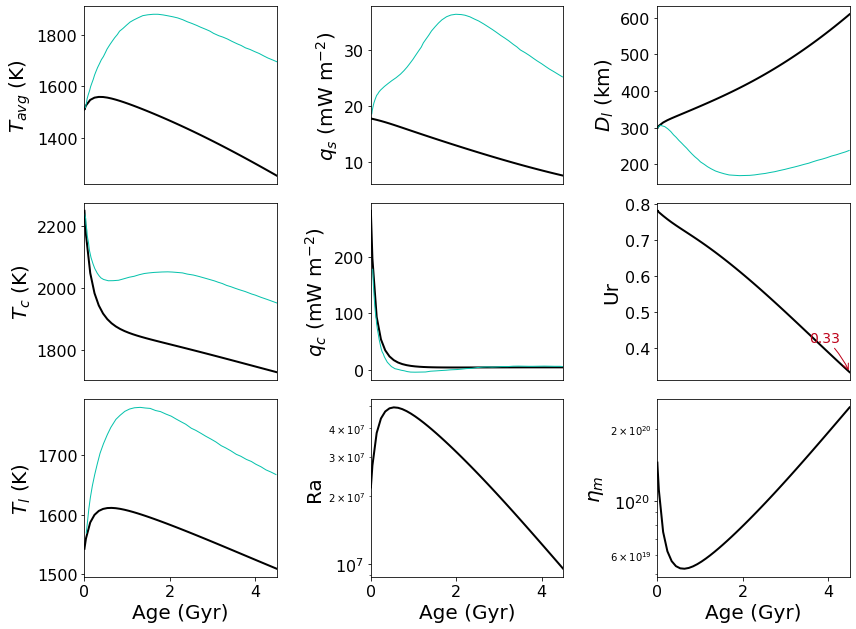

In [2]:
def evols_benchmarks(pl_ids=['Mars1', 'Mars_Breuer'], 
                    bm_dirs=['thiriet_Mars1', 'breuer_Mars'],
                    bm_labels=['Thiriet+ (2019)', 'Breuer+ (2010)'],
                    bm_colours=['xkcd:turquoise', 'xkcd:cornflower'], ls=['-', '--'],
                    save=True, fname='thermal_Mars1', legend_axis=4, fig_path=fig_path):

    #  reproduce Thiriet+ 2019 Mars1 and Breuer Mars

    names = {'T_avg':('$T_{avg}$ (K)',1), 
             'q_sfc':('$q_{s}$ (mW m$^{-2}$)',1e3),
             'D_l':('$D_l$ (km)',1e-3),
             'T_c':('$T_c$ (K)', 1), 
             'q_core':('$q_{c}$ (mW m$^{-2}$)', 1e3), 
             'urey':('Ur',1),
             'T_l':('$T_l$ (K)',1), 
             'Ra_i':('Ra',1), 
             'eta_m':('$\eta_m$',1),
            }

    legax = None
    fig = None
    axes = None
    title = ''
    for ii, pl_id in enumerate(pl_ids):             
        fig, axes = plottop.benchmark_thermal_plots(pl_id, names=names, compare_dir=benchmark_path+bm_dirs[ii], 
                                            fig_path=goodfig_path, fig=fig, axes=axes,
                                            plots_save=True, print_tf=True, legsize=14, ncols=3, labelsize=20,
                                            annotate_colour='xkcd:scarlet', ticksize=16, fname=fname,
                                            show_qsfc_error=False, legax=None, verbose=True,
                                            title=title, 
                                            label='After below', 
                                            cmp_label=bm_labels[ii],
                                            fontname='CMU Serif Roman',
                                            line_args={'c':'k', 'lw':2, 'ls':ls[ii]},
                                            cmp_line_args={'c':bm_colours[ii], 'lw':1, 'ls':ls[ii]},
                                           )
        if ii == len(pl_ids) - 1:
            legax = legend_axis
            fig = fig
            axes = axes
            title = 'Mars-like planet'

    fig.subplots_adjust(wspace=.49)
    if save:
        fig.savefig(fig_path+fname+fig_format, bbox_inches='tight')

# expect q_sfc to be off by <=4.5 mW m^-3 average without PDE
evols_benchmarks(pl_ids=['Mars1'],#, 'Mars_Breuer'], 
                    bm_dirs=['thiriet_Mars1'],#, 'breuer_Mars'],
                    bm_labels=['Thiriet+ (2019)'],#, 'Breuer+ (2010)'],
                    bm_colours=['xkcd:turquoise', 'xkcd:cornflower'], ls=['-', '--'],
                    save=False)

In [7]:
# test case

eta_m = 2.4463038299888465e+20
dT = 220 # T_c - T_l
d_m = 1091190.0462106797 # R_l - R_c
rho = 3500
alpha = 2.5e-5
c_p = 1142
k_m = 4
kappa = k_m / (rho * c_p)
g = 3.6891747404844284
F = 0.0068065091449158455
R_p0=3400e3
R_c0=1700e3
L = R_p0 - R_c0
T_c = 1729
T_s = 250
T = T_c - T_s

Ra_i_eff = alpha*rho*g*dT*d_m**3 / (eta_m*kappa)
print('Ra_i_eff')
h_2d = 0.094*Ra_i_eff**-0.151 * alpha * L * T

h_iso = 5.4 * ((alpha*F*eta_m*kappa)/(rho*g*k_m))**(1/2)
Ra_F = g * rho * alpha * d_m**4 * F / (kappa * k_m * eta_m)
h_iso2 = 5.4*eta_m*kappa/(rho*g*d_m**2) * Ra_F**0.5
print('Ra_F', Ra_F)

print('h_2d', h_2d)
print('h_iso', h_iso)
print('h_iso2', h_iso2)

Ra_i_eff
Ra_F 18739636.72322609
h_2d 850.109748440451
h_iso 153.36118953686307
h_iso2 153.36118953686307


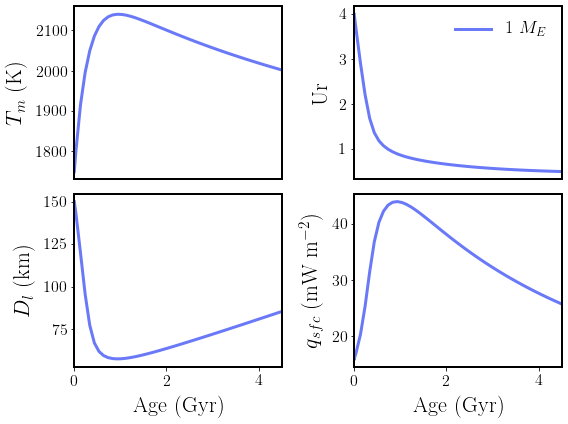

In [16]:
# single evolution subplots

names = {'T_m':('$T_m$ (K)',1), 'urey':('Ur',1),
         'D_l':('$D_l$ (km)',1e-3),
         'q_sfc':('$q_{sfc}$ (mW m$^{-2}$)',1e3),
        }
fig, axes = plottop.benchmark_thermal_plots('Earthbaseline', model_update_args={'D_l0':150e3},
                                    names=names, compare_dir=None, 
                                    fig_path=fig_path, labelpad=7,
                                    plots_save=False,  legsize=18, ncols=2, labelsize=22,
                                    annotate_colour='xkcd:scarlet', ticksize=16, fname='thermal_1ME_slides',
                                    label='1 $M_E$', legax=1, title='',
                                    fontname='CMU Serif Roman',
                                    line_args={'c':'xkcd:cornflower', 'lw':3, 'ls':'-'},
                                   )
plt.subplots_adjust(wspace=0.35)

(<Figure size 864x1080 with 14 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9de816190>,
       dtype=object))

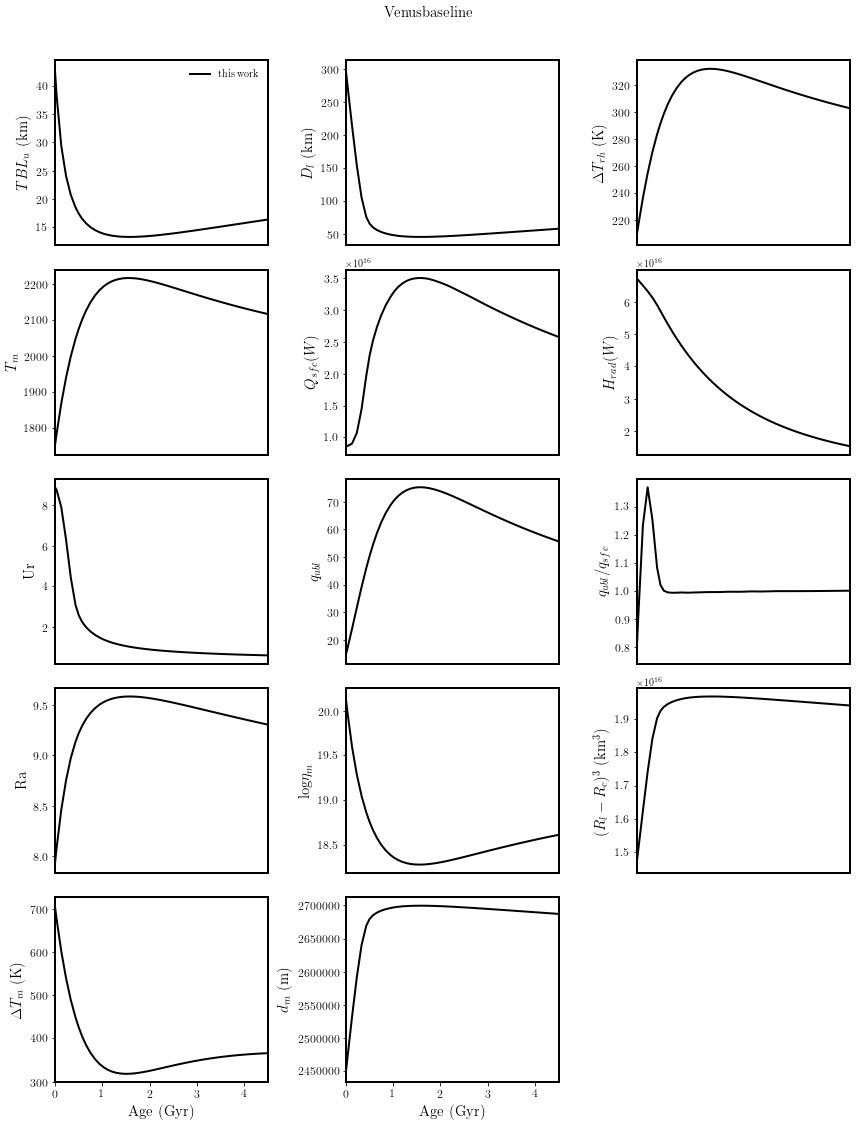

In [18]:
# testing evolutions
pl = pltt.build_solarsystem(run_args={'T_m0':1750, 'D_l0':300e3},
                        ident_list=['Venusbaseline'])[0]

names = {'TBL_u':('$TBL_u$ (km)',1e-3), 
         'D_l':('$D_l$ (km)',1e-3),
         'T_m - pl.T_l':('$\Delta T_{rh}$ (K)',1), 
         'T_m':('$T_m$', 1),
         'Q_sfc':('$Q_{sfc} (W)$', 1e3),
         'H_rad_m':('$H_{rad} (W)$', 1e3),
         'urey':('Ur', 1),
         'q_ubl':('$q_{ubl}$', 1e3),
         'q_ubl/pl.q_sfc':('$q_{ubl}/q_{sfc}$', 1),
         'Ra_i':('Ra', 1),
         'eta_m':('log$\eta_m$', 1),
         'd_m**3':('($R_l - R_c)^3$ (km$^3$)', 1e-3),
         'deltaT_m':('$\Delta T_m$ (K)',1), 
         'd_m':('$d_m$ (m)',1), 
        }
save=False
# snaps(pl, plot_snapshots=[0, 4.5], fig_path=fig_path, plots_save=save, ident=ident, **kwargs)
pltt.plot_output(pl, names, ncols=3, plots_save=save, fig_path=fig_path)
